## Импорт бибилиотек и файла

In [131]:
import pandas as pd
pd.set_option('max_colwidth', 500)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [91]:
df = pd.read_csv("labeled.csv")

## EDA

In [92]:
df['toxic'] = df['toxic'].replace(1.0, 'neg')
df['toxic'] = df['toxic'].replace(0.0, 'pos')

In [93]:
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",neg
1,"Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.\n",neg
2,Собаке - собачья смерть\n,neg
3,"Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?\n",neg
4,"тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)\n",neg
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и сторонник демократии и свободы слова закукарекал.\n,neg
14408,"А кого любить? Гоблина тупорылого что-ли? Или какую-нибудь продажную суку из демшизы? Нет уж, спасибо не надо.\n",neg
14409,"Посмотрел Утомленных солнцем 2. И оказалось, что это хороший фильм, такая высокобюджетная артхаусятина, к которой могут быть претензии только потому, что спиздили-распилили и вообще ТАК НЕ БЫВАЕТ. Ну нахуй этих критиков. Обзоры длиннее фильмов, петросянство хуже рашкокомедий, ебанутая ненависть и доебки по мелочам.\n",pos
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ НЕТ ОБСУЖДЕНИЯ ПОЛИТИКИ. СВОБОДНОЕ ОБЩЕНИЕ ЭТО В b. ЭТО ТОЖЕ САМОЕ ЕСЛИ Я НА ДОСКЕ О ПОЛИТИКЕ СОЗДАМ ТРЕД О ТОМ КАК ПЛОХО БЕЗ ТЯНОЧКИ. ТАК ЧТО УЕБЫВАЙТЕ В Б ИЛИ НВР СО СВОИМ ЧАТИКОМ ПРЕСТАРЕЛЫХ ГОМОСЕКОВ!\n,neg


In [125]:
df['comment'] = df['comment'].str.replace('\n', '')

In [124]:
df

,comment,toxic
0,"верблюдов-то за что? дебилы, бл...",neg
1,"хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. если бы хохлов не было, кисель их бы придумал.",neg
2,собаке - собачья смерть,neg
3,"страницу обнови, дебил. это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. или мы в тебя верим - это ты и твои воображаемые друзья?",neg
4,"тебя не убедил 6-страничный пдф в том, что скрипалей отравила россия? анализировать и думать пытаешься? ватник что ли?)",neg
...,...,...
14407,вонючий совковый скот прибежал и ноет. а вот и сторонник демократии и свободы слова закукарекал.,neg
14408,"а кого любить? гоблина тупорылого что-ли? или какую-нибудь продажную суку из демшизы? нет уж, спасибо не надо.",neg
14409,"посмотрел утомленных солнцем 2. и оказалось, что это хороший фильм, такая высокобюджетная артхаусятина, к которой могут быть претензии только потому, что спиздили-распилили и вообще так не бывает. ну нахуй этих критиков. обзоры длиннее фильмов, петросянство хуже рашкокомедий, ебанутая ненависть и доебки по мелочам.",pos
14410,крымотред нарушает правила раздела т.к в нем нет обсуждения политики. свободное общение это в b. это тоже самое если я на доске о политике создам тред о том как плохо без тяночки. так что уебывайте в б или нвр со своим чатиком престарелых гомосеков!,neg


<Axes: xlabel='toxic', ylabel='count'>

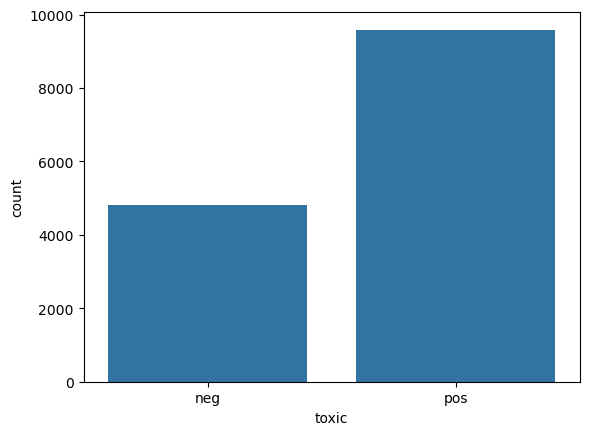

In [96]:
sns.countplot(data = df, x = 'toxic')

## Обучение модели

In [97]:
x = df['comment']

In [98]:
y = df['toxic']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:
bow = CountVectorizer()

In [100]:
tfidf = TfidfVectorizer()

In [101]:
tfidf.fit(X_train)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [133]:
bow.fit(X_train)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [102]:
X_train_tfidf = tfidf.transform(X_train)

In [103]:
X_test_tfidf = tfidf.transform(X_test)

In [104]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 254657 stored elements and shape (11529, 58997)>

In [105]:
nb = MultinomialNB()

In [106]:
nb.fit(X_train_tfidf,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [107]:
rbf_svc = SVC()

In [108]:
rbf_svc.fit(X_train_tfidf,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Функция для сравненеи результатат модели

In [109]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    conf_mat = confusion_matrix(y_test, preds, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels= model.classes_)
    disp.plot()

### Результаты НБК на основание TF-IDF

              precision    recall  f1-score   support

         neg       0.96      0.24      0.39       939
         pos       0.73      1.00      0.84      1944

    accuracy                           0.75      2883
   macro avg       0.85      0.62      0.62      2883
weighted avg       0.81      0.75      0.70      2883



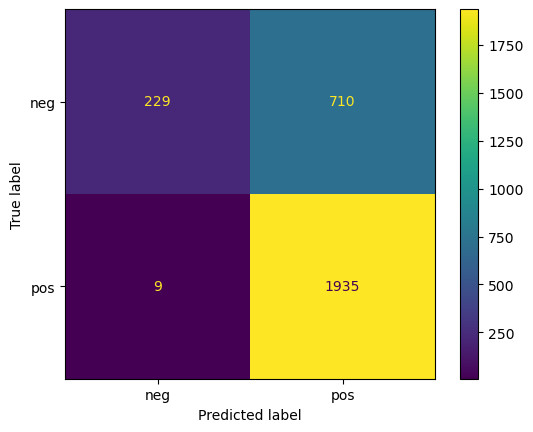

In [110]:
report(nb)

### Результаты SVC на основание TF-IDF

              precision    recall  f1-score   support

         neg       0.89      0.61      0.72       939
         pos       0.84      0.96      0.90      1944

    accuracy                           0.85      2883
   macro avg       0.86      0.79      0.81      2883
weighted avg       0.85      0.85      0.84      2883



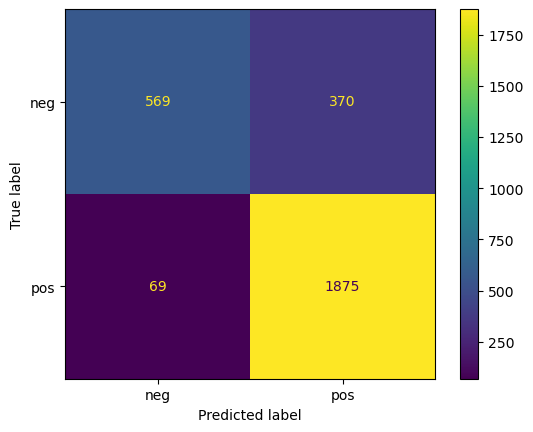

In [111]:
report(rbf_svc)

### Создание пайплайна

In [112]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ("svc", SVC())])

In [113]:
pipe.fit(x, y)

,steps,"[('tfidf', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [114]:
pipe.predict(['Твоя мама красивая женщина'])

array(['pos'], dtype=object)

In [115]:
pipe.predict(['Твоя мама некрасивая женщина'])

array(['neg'], dtype=object)

In [118]:
pipe.predict(['Помидор'])

array(['pos'], dtype=object)

In [119]:
pipe.predict(['Крым'])

array(['neg'], dtype=object)

In [120]:
pipe.predict(['Украина'])

array(['neg'], dtype=object)

In [121]:
pipe.predict(['Россия'])

array(['neg'], dtype=object)

In [122]:
pipe.predict(['Сша'])

array(['pos'], dtype=object)

In [126]:
pipe.predict(['просто обычный нейтральный текст без матов и гадостей'])

array(['pos'], dtype=object)

In [128]:
pipe.predict(['просто плохой негативный текст с матами и гадостями'])

array(['pos'], dtype=object)